In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/JOHN WESLEY/Downloads/archive (6)/Data/Raw/Sample - Superstore.csv', low_memory=False, encoding='latin1')

# Preview first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print(df.columns.tolist())
print(df.info())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region      

In [5]:
# Drop exact duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())

# Optional: fill or drop nulls in key numeric columns
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


KeyError: 'sales'

In [ ]:
df['profit_margin'] = df['profit'] / df['sales'].replace({0: pd.NA})


In [ ]:
# Total Sales, Total Profit, Profit Margin, Average Order Value
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
profit_margin = total_profit / total_sales
aov = df.groupby('order_id')['sales'].sum().mean()  # Average order value

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2%}")
print(f"Average Order Value (AOV): ${aov:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Average Order Value (AOV): $458.61


C:\Users\JOHN WESLEY\AppData\Local\Temp\ipykernel_1224\4261241761.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()


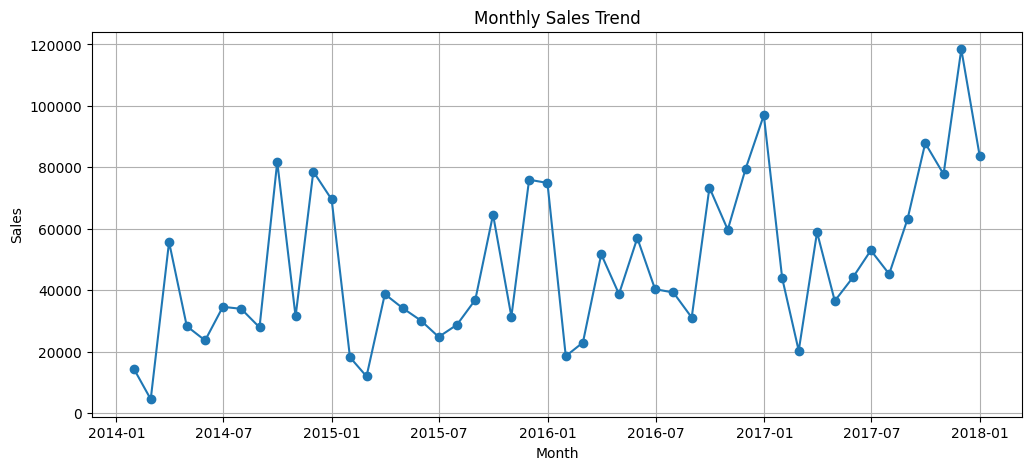

In [ ]:
# Aggregate monthly sales
monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [ ]:
# Top 10 products by sales
top_products_sales = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products_sales)

# Top 10 products by profit
top_products_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Profit:\n", top_products_profit)


Top 10 Products by Sales:
 product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64

Top 10 Products by Profit:
 product_name


In [ ]:
top_regions = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("\nSales by Region:\n", top_regions)



Sales by Region:
 region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64
